In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')

In [7]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)

In [9]:
vocab = model.keys()
# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    idf_title_vectorizer = CountVectorizer()
    idf_title_features = idf_title_vectorizer.fit_transform(data['title'])
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

In [10]:
doc_id = 0
w2v_title_vector = []
# for every title we build a weighted vector representation
for i in data['title']:
    print("Doc_id:",doc_id)
    w2v_title_vector.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1
# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title_vector = np.array(w2v_title_vector)


Doc_id: 0
Doc_id: 1
Doc_id: 2
Doc_id: 3
Doc_id: 4
Doc_id: 5
Doc_id: 6
Doc_id: 7
Doc_id: 8
Doc_id: 9
Doc_id: 10
Doc_id: 11
Doc_id: 12
Doc_id: 13
Doc_id: 14
Doc_id: 15
Doc_id: 16
Doc_id: 17
Doc_id: 18
Doc_id: 19
Doc_id: 20
Doc_id: 21
Doc_id: 22
Doc_id: 23
Doc_id: 24
Doc_id: 25
Doc_id: 26
Doc_id: 27
Doc_id: 28
Doc_id: 29
Doc_id: 30
Doc_id: 31
Doc_id: 32
Doc_id: 33
Doc_id: 34
Doc_id: 35
Doc_id: 36
Doc_id: 37
Doc_id: 38
Doc_id: 39
Doc_id: 40
Doc_id: 41
Doc_id: 42
Doc_id: 43
Doc_id: 44
Doc_id: 45
Doc_id: 46
Doc_id: 47
Doc_id: 48
Doc_id: 49
Doc_id: 50
Doc_id: 51
Doc_id: 52
Doc_id: 53
Doc_id: 54
Doc_id: 55
Doc_id: 56
Doc_id: 57
Doc_id: 58
Doc_id: 59
Doc_id: 60
Doc_id: 61
Doc_id: 62
Doc_id: 63
Doc_id: 64
Doc_id: 65
Doc_id: 66
Doc_id: 67
Doc_id: 68
Doc_id: 69
Doc_id: 70
Doc_id: 71
Doc_id: 72
Doc_id: 73
Doc_id: 74
Doc_id: 75
Doc_id: 76
Doc_id: 77
Doc_id: 78
Doc_id: 79
Doc_id: 80
Doc_id: 81
Doc_id: 82
Doc_id: 83
Doc_id: 84
Doc_id: 85
Doc_id: 86
Doc_id: 87
Doc_id: 88
Doc_id: 89
Doc_id: 90
Doc_id: 9

Doc_id: 693
Doc_id: 694
Doc_id: 695
Doc_id: 696
Doc_id: 697
Doc_id: 698
Doc_id: 699
Doc_id: 700
Doc_id: 701
Doc_id: 702
Doc_id: 703
Doc_id: 704
Doc_id: 705
Doc_id: 706
Doc_id: 707
Doc_id: 708
Doc_id: 709
Doc_id: 710
Doc_id: 711
Doc_id: 712
Doc_id: 713
Doc_id: 714
Doc_id: 715
Doc_id: 716
Doc_id: 717
Doc_id: 718
Doc_id: 719
Doc_id: 720
Doc_id: 721
Doc_id: 722
Doc_id: 723
Doc_id: 724
Doc_id: 725
Doc_id: 726
Doc_id: 727
Doc_id: 728
Doc_id: 729
Doc_id: 730
Doc_id: 731
Doc_id: 732
Doc_id: 733
Doc_id: 734
Doc_id: 735
Doc_id: 736
Doc_id: 737
Doc_id: 738
Doc_id: 739
Doc_id: 740
Doc_id: 741
Doc_id: 742
Doc_id: 743
Doc_id: 744
Doc_id: 745
Doc_id: 746
Doc_id: 747
Doc_id: 748
Doc_id: 749
Doc_id: 750
Doc_id: 751
Doc_id: 752
Doc_id: 753
Doc_id: 754
Doc_id: 755
Doc_id: 756
Doc_id: 757
Doc_id: 758
Doc_id: 759
Doc_id: 760
Doc_id: 761
Doc_id: 762
Doc_id: 763
Doc_id: 764
Doc_id: 765
Doc_id: 766
Doc_id: 767
Doc_id: 768
Doc_id: 769
Doc_id: 770
Doc_id: 771
Doc_id: 772
Doc_id: 773
Doc_id: 774
Doc_id: 775
Doc_

Doc_id: 1348
Doc_id: 1349
Doc_id: 1350
Doc_id: 1351
Doc_id: 1352
Doc_id: 1353
Doc_id: 1354
Doc_id: 1355
Doc_id: 1356
Doc_id: 1357
Doc_id: 1358
Doc_id: 1359
Doc_id: 1360
Doc_id: 1361
Doc_id: 1362
Doc_id: 1363
Doc_id: 1364
Doc_id: 1365
Doc_id: 1366
Doc_id: 1367
Doc_id: 1368
Doc_id: 1369
Doc_id: 1370
Doc_id: 1371
Doc_id: 1372
Doc_id: 1373
Doc_id: 1374
Doc_id: 1375
Doc_id: 1376
Doc_id: 1377
Doc_id: 1378
Doc_id: 1379
Doc_id: 1380
Doc_id: 1381
Doc_id: 1382
Doc_id: 1383
Doc_id: 1384
Doc_id: 1385
Doc_id: 1386
Doc_id: 1387
Doc_id: 1388
Doc_id: 1389
Doc_id: 1390
Doc_id: 1391
Doc_id: 1392
Doc_id: 1393
Doc_id: 1394
Doc_id: 1395
Doc_id: 1396
Doc_id: 1397
Doc_id: 1398
Doc_id: 1399
Doc_id: 1400
Doc_id: 1401
Doc_id: 1402
Doc_id: 1403
Doc_id: 1404
Doc_id: 1405
Doc_id: 1406
Doc_id: 1407
Doc_id: 1408
Doc_id: 1409
Doc_id: 1410
Doc_id: 1411
Doc_id: 1412
Doc_id: 1413
Doc_id: 1414
Doc_id: 1415
Doc_id: 1416
Doc_id: 1417
Doc_id: 1418
Doc_id: 1419
Doc_id: 1420
Doc_id: 1421
Doc_id: 1422
Doc_id: 1423
Doc_id: 1424

Doc_id: 1980
Doc_id: 1981
Doc_id: 1982
Doc_id: 1983
Doc_id: 1984
Doc_id: 1985
Doc_id: 1986
Doc_id: 1987
Doc_id: 1988
Doc_id: 1989
Doc_id: 1990
Doc_id: 1991
Doc_id: 1992
Doc_id: 1993
Doc_id: 1994
Doc_id: 1995
Doc_id: 1996
Doc_id: 1997
Doc_id: 1998
Doc_id: 1999
Doc_id: 2000
Doc_id: 2001
Doc_id: 2002
Doc_id: 2003
Doc_id: 2004
Doc_id: 2005
Doc_id: 2006
Doc_id: 2007
Doc_id: 2008
Doc_id: 2009
Doc_id: 2010
Doc_id: 2011
Doc_id: 2012
Doc_id: 2013
Doc_id: 2014
Doc_id: 2015
Doc_id: 2016
Doc_id: 2017
Doc_id: 2018
Doc_id: 2019
Doc_id: 2020
Doc_id: 2021
Doc_id: 2022
Doc_id: 2023
Doc_id: 2024
Doc_id: 2025
Doc_id: 2026
Doc_id: 2027
Doc_id: 2028
Doc_id: 2029
Doc_id: 2030
Doc_id: 2031
Doc_id: 2032
Doc_id: 2033
Doc_id: 2034
Doc_id: 2035
Doc_id: 2036
Doc_id: 2037
Doc_id: 2038
Doc_id: 2039
Doc_id: 2040
Doc_id: 2041
Doc_id: 2042
Doc_id: 2043
Doc_id: 2044
Doc_id: 2045
Doc_id: 2046
Doc_id: 2047
Doc_id: 2048
Doc_id: 2049
Doc_id: 2050
Doc_id: 2051
Doc_id: 2052
Doc_id: 2053
Doc_id: 2054
Doc_id: 2055
Doc_id: 2056

Doc_id: 2612
Doc_id: 2613
Doc_id: 2614
Doc_id: 2615
Doc_id: 2616
Doc_id: 2617
Doc_id: 2618
Doc_id: 2619
Doc_id: 2620
Doc_id: 2621
Doc_id: 2622
Doc_id: 2623
Doc_id: 2624
Doc_id: 2625
Doc_id: 2626
Doc_id: 2627
Doc_id: 2628
Doc_id: 2629
Doc_id: 2630
Doc_id: 2631
Doc_id: 2632
Doc_id: 2633
Doc_id: 2634
Doc_id: 2635
Doc_id: 2636
Doc_id: 2637
Doc_id: 2638
Doc_id: 2639
Doc_id: 2640
Doc_id: 2641
Doc_id: 2642
Doc_id: 2643
Doc_id: 2644
Doc_id: 2645
Doc_id: 2646
Doc_id: 2647
Doc_id: 2648
Doc_id: 2649
Doc_id: 2650
Doc_id: 2651
Doc_id: 2652
Doc_id: 2653
Doc_id: 2654
Doc_id: 2655
Doc_id: 2656
Doc_id: 2657
Doc_id: 2658
Doc_id: 2659
Doc_id: 2660
Doc_id: 2661
Doc_id: 2662
Doc_id: 2663
Doc_id: 2664
Doc_id: 2665
Doc_id: 2666
Doc_id: 2667
Doc_id: 2668
Doc_id: 2669
Doc_id: 2670
Doc_id: 2671
Doc_id: 2672
Doc_id: 2673
Doc_id: 2674
Doc_id: 2675
Doc_id: 2676
Doc_id: 2677
Doc_id: 2678
Doc_id: 2679
Doc_id: 2680
Doc_id: 2681
Doc_id: 2682
Doc_id: 2683
Doc_id: 2684
Doc_id: 2685
Doc_id: 2686
Doc_id: 2687
Doc_id: 2688

Doc_id: 3244
Doc_id: 3245
Doc_id: 3246
Doc_id: 3247
Doc_id: 3248
Doc_id: 3249
Doc_id: 3250
Doc_id: 3251
Doc_id: 3252
Doc_id: 3253
Doc_id: 3254
Doc_id: 3255
Doc_id: 3256
Doc_id: 3257
Doc_id: 3258
Doc_id: 3259
Doc_id: 3260
Doc_id: 3261
Doc_id: 3262
Doc_id: 3263
Doc_id: 3264
Doc_id: 3265
Doc_id: 3266
Doc_id: 3267
Doc_id: 3268
Doc_id: 3269
Doc_id: 3270
Doc_id: 3271
Doc_id: 3272
Doc_id: 3273
Doc_id: 3274
Doc_id: 3275
Doc_id: 3276
Doc_id: 3277
Doc_id: 3278
Doc_id: 3279
Doc_id: 3280
Doc_id: 3281
Doc_id: 3282
Doc_id: 3283
Doc_id: 3284
Doc_id: 3285
Doc_id: 3286
Doc_id: 3287
Doc_id: 3288
Doc_id: 3289
Doc_id: 3290
Doc_id: 3291
Doc_id: 3292
Doc_id: 3293
Doc_id: 3294
Doc_id: 3295
Doc_id: 3296
Doc_id: 3297
Doc_id: 3298
Doc_id: 3299
Doc_id: 3300
Doc_id: 3301
Doc_id: 3302
Doc_id: 3303
Doc_id: 3304
Doc_id: 3305
Doc_id: 3306
Doc_id: 3307
Doc_id: 3308
Doc_id: 3309
Doc_id: 3310
Doc_id: 3311
Doc_id: 3312
Doc_id: 3313
Doc_id: 3314
Doc_id: 3315
Doc_id: 3316
Doc_id: 3317
Doc_id: 3318
Doc_id: 3319
Doc_id: 3320

Doc_id: 3875
Doc_id: 3876
Doc_id: 3877
Doc_id: 3878
Doc_id: 3879
Doc_id: 3880
Doc_id: 3881
Doc_id: 3882
Doc_id: 3883
Doc_id: 3884
Doc_id: 3885
Doc_id: 3886
Doc_id: 3887
Doc_id: 3888
Doc_id: 3889
Doc_id: 3890
Doc_id: 3891
Doc_id: 3892
Doc_id: 3893
Doc_id: 3894
Doc_id: 3895
Doc_id: 3896
Doc_id: 3897
Doc_id: 3898
Doc_id: 3899
Doc_id: 3900
Doc_id: 3901
Doc_id: 3902
Doc_id: 3903
Doc_id: 3904
Doc_id: 3905
Doc_id: 3906
Doc_id: 3907
Doc_id: 3908
Doc_id: 3909
Doc_id: 3910
Doc_id: 3911
Doc_id: 3912
Doc_id: 3913
Doc_id: 3914
Doc_id: 3915
Doc_id: 3916
Doc_id: 3917
Doc_id: 3918
Doc_id: 3919
Doc_id: 3920
Doc_id: 3921
Doc_id: 3922
Doc_id: 3923
Doc_id: 3924
Doc_id: 3925
Doc_id: 3926
Doc_id: 3927
Doc_id: 3928
Doc_id: 3929
Doc_id: 3930
Doc_id: 3931
Doc_id: 3932
Doc_id: 3933
Doc_id: 3934
Doc_id: 3935
Doc_id: 3936
Doc_id: 3937
Doc_id: 3938
Doc_id: 3939
Doc_id: 3940
Doc_id: 3941
Doc_id: 3942
Doc_id: 3943
Doc_id: 3944
Doc_id: 3945
Doc_id: 3946
Doc_id: 3947
Doc_id: 3948
Doc_id: 3949
Doc_id: 3950
Doc_id: 3951

Doc_id: 4507
Doc_id: 4508
Doc_id: 4509
Doc_id: 4510
Doc_id: 4511
Doc_id: 4512
Doc_id: 4513
Doc_id: 4514
Doc_id: 4515
Doc_id: 4516
Doc_id: 4517
Doc_id: 4518
Doc_id: 4519
Doc_id: 4520
Doc_id: 4521
Doc_id: 4522
Doc_id: 4523
Doc_id: 4524
Doc_id: 4525
Doc_id: 4526
Doc_id: 4527
Doc_id: 4528
Doc_id: 4529
Doc_id: 4530
Doc_id: 4531
Doc_id: 4532
Doc_id: 4533
Doc_id: 4534
Doc_id: 4535
Doc_id: 4536
Doc_id: 4537
Doc_id: 4538
Doc_id: 4539
Doc_id: 4540
Doc_id: 4541
Doc_id: 4542
Doc_id: 4543
Doc_id: 4544
Doc_id: 4545
Doc_id: 4546
Doc_id: 4547
Doc_id: 4548
Doc_id: 4549
Doc_id: 4550
Doc_id: 4551
Doc_id: 4552
Doc_id: 4553
Doc_id: 4554
Doc_id: 4555
Doc_id: 4556
Doc_id: 4557
Doc_id: 4558
Doc_id: 4559
Doc_id: 4560
Doc_id: 4561
Doc_id: 4562
Doc_id: 4563
Doc_id: 4564
Doc_id: 4565
Doc_id: 4566
Doc_id: 4567
Doc_id: 4568
Doc_id: 4569
Doc_id: 4570
Doc_id: 4571
Doc_id: 4572
Doc_id: 4573
Doc_id: 4574
Doc_id: 4575
Doc_id: 4576
Doc_id: 4577
Doc_id: 4578
Doc_id: 4579
Doc_id: 4580
Doc_id: 4581
Doc_id: 4582
Doc_id: 4583

Doc_id: 5139
Doc_id: 5140
Doc_id: 5141
Doc_id: 5142
Doc_id: 5143
Doc_id: 5144
Doc_id: 5145
Doc_id: 5146
Doc_id: 5147
Doc_id: 5148
Doc_id: 5149
Doc_id: 5150
Doc_id: 5151
Doc_id: 5152
Doc_id: 5153
Doc_id: 5154
Doc_id: 5155
Doc_id: 5156
Doc_id: 5157
Doc_id: 5158
Doc_id: 5159
Doc_id: 5160
Doc_id: 5161
Doc_id: 5162
Doc_id: 5163
Doc_id: 5164
Doc_id: 5165
Doc_id: 5166
Doc_id: 5167
Doc_id: 5168
Doc_id: 5169
Doc_id: 5170
Doc_id: 5171
Doc_id: 5172
Doc_id: 5173
Doc_id: 5174
Doc_id: 5175
Doc_id: 5176
Doc_id: 5177
Doc_id: 5178
Doc_id: 5179
Doc_id: 5180
Doc_id: 5181
Doc_id: 5182
Doc_id: 5183
Doc_id: 5184
Doc_id: 5185
Doc_id: 5186
Doc_id: 5187
Doc_id: 5188
Doc_id: 5189
Doc_id: 5190
Doc_id: 5191
Doc_id: 5192
Doc_id: 5193
Doc_id: 5194
Doc_id: 5195
Doc_id: 5196
Doc_id: 5197
Doc_id: 5198
Doc_id: 5199
Doc_id: 5200
Doc_id: 5201
Doc_id: 5202
Doc_id: 5203
Doc_id: 5204
Doc_id: 5205
Doc_id: 5206
Doc_id: 5207
Doc_id: 5208
Doc_id: 5209
Doc_id: 5210
Doc_id: 5211
Doc_id: 5212
Doc_id: 5213
Doc_id: 5214
Doc_id: 5215

Doc_id: 5771
Doc_id: 5772
Doc_id: 5773
Doc_id: 5774
Doc_id: 5775
Doc_id: 5776
Doc_id: 5777
Doc_id: 5778
Doc_id: 5779
Doc_id: 5780
Doc_id: 5781
Doc_id: 5782
Doc_id: 5783
Doc_id: 5784
Doc_id: 5785
Doc_id: 5786
Doc_id: 5787
Doc_id: 5788
Doc_id: 5789
Doc_id: 5790
Doc_id: 5791
Doc_id: 5792
Doc_id: 5793
Doc_id: 5794
Doc_id: 5795
Doc_id: 5796
Doc_id: 5797
Doc_id: 5798
Doc_id: 5799
Doc_id: 5800
Doc_id: 5801
Doc_id: 5802
Doc_id: 5803
Doc_id: 5804
Doc_id: 5805
Doc_id: 5806
Doc_id: 5807
Doc_id: 5808
Doc_id: 5809
Doc_id: 5810
Doc_id: 5811
Doc_id: 5812
Doc_id: 5813
Doc_id: 5814
Doc_id: 5815
Doc_id: 5816
Doc_id: 5817
Doc_id: 5818
Doc_id: 5819
Doc_id: 5820
Doc_id: 5821
Doc_id: 5822
Doc_id: 5823
Doc_id: 5824
Doc_id: 5825
Doc_id: 5826
Doc_id: 5827
Doc_id: 5828
Doc_id: 5829
Doc_id: 5830
Doc_id: 5831
Doc_id: 5832
Doc_id: 5833
Doc_id: 5834
Doc_id: 5835
Doc_id: 5836
Doc_id: 5837
Doc_id: 5838
Doc_id: 5839
Doc_id: 5840
Doc_id: 5841
Doc_id: 5842
Doc_id: 5843
Doc_id: 5844
Doc_id: 5845
Doc_id: 5846
Doc_id: 5847

Doc_id: 6402
Doc_id: 6403
Doc_id: 6404
Doc_id: 6405
Doc_id: 6406
Doc_id: 6407
Doc_id: 6408
Doc_id: 6409
Doc_id: 6410
Doc_id: 6411
Doc_id: 6412
Doc_id: 6413
Doc_id: 6414
Doc_id: 6415
Doc_id: 6416
Doc_id: 6417
Doc_id: 6418
Doc_id: 6419
Doc_id: 6420
Doc_id: 6421
Doc_id: 6422
Doc_id: 6423
Doc_id: 6424
Doc_id: 6425
Doc_id: 6426
Doc_id: 6427
Doc_id: 6428
Doc_id: 6429
Doc_id: 6430
Doc_id: 6431
Doc_id: 6432
Doc_id: 6433
Doc_id: 6434
Doc_id: 6435
Doc_id: 6436
Doc_id: 6437
Doc_id: 6438
Doc_id: 6439
Doc_id: 6440
Doc_id: 6441
Doc_id: 6442
Doc_id: 6443
Doc_id: 6444
Doc_id: 6445
Doc_id: 6446
Doc_id: 6447
Doc_id: 6448
Doc_id: 6449
Doc_id: 6450
Doc_id: 6451
Doc_id: 6452
Doc_id: 6453
Doc_id: 6454
Doc_id: 6455
Doc_id: 6456
Doc_id: 6457
Doc_id: 6458
Doc_id: 6459
Doc_id: 6460
Doc_id: 6461
Doc_id: 6462
Doc_id: 6463
Doc_id: 6464
Doc_id: 6465
Doc_id: 6466
Doc_id: 6467
Doc_id: 6468
Doc_id: 6469
Doc_id: 6470
Doc_id: 6471
Doc_id: 6472
Doc_id: 6473
Doc_id: 6474
Doc_id: 6475
Doc_id: 6476
Doc_id: 6477
Doc_id: 6478

Doc_id: 7033
Doc_id: 7034
Doc_id: 7035
Doc_id: 7036
Doc_id: 7037
Doc_id: 7038
Doc_id: 7039
Doc_id: 7040
Doc_id: 7041
Doc_id: 7042
Doc_id: 7043
Doc_id: 7044
Doc_id: 7045
Doc_id: 7046
Doc_id: 7047
Doc_id: 7048
Doc_id: 7049
Doc_id: 7050
Doc_id: 7051
Doc_id: 7052
Doc_id: 7053
Doc_id: 7054
Doc_id: 7055
Doc_id: 7056
Doc_id: 7057
Doc_id: 7058
Doc_id: 7059
Doc_id: 7060
Doc_id: 7061
Doc_id: 7062
Doc_id: 7063
Doc_id: 7064
Doc_id: 7065
Doc_id: 7066
Doc_id: 7067
Doc_id: 7068
Doc_id: 7069
Doc_id: 7070
Doc_id: 7071
Doc_id: 7072
Doc_id: 7073
Doc_id: 7074
Doc_id: 7075
Doc_id: 7076
Doc_id: 7077
Doc_id: 7078
Doc_id: 7079
Doc_id: 7080
Doc_id: 7081
Doc_id: 7082
Doc_id: 7083
Doc_id: 7084
Doc_id: 7085
Doc_id: 7086
Doc_id: 7087
Doc_id: 7088
Doc_id: 7089
Doc_id: 7090
Doc_id: 7091
Doc_id: 7092
Doc_id: 7093
Doc_id: 7094
Doc_id: 7095
Doc_id: 7096
Doc_id: 7097
Doc_id: 7098
Doc_id: 7099
Doc_id: 7100
Doc_id: 7101
Doc_id: 7102
Doc_id: 7103
Doc_id: 7104
Doc_id: 7105
Doc_id: 7106
Doc_id: 7107
Doc_id: 7108
Doc_id: 7109

Doc_id: 7664
Doc_id: 7665
Doc_id: 7666
Doc_id: 7667
Doc_id: 7668
Doc_id: 7669
Doc_id: 7670
Doc_id: 7671
Doc_id: 7672
Doc_id: 7673
Doc_id: 7674
Doc_id: 7675
Doc_id: 7676
Doc_id: 7677
Doc_id: 7678
Doc_id: 7679
Doc_id: 7680
Doc_id: 7681
Doc_id: 7682
Doc_id: 7683
Doc_id: 7684
Doc_id: 7685
Doc_id: 7686
Doc_id: 7687
Doc_id: 7688
Doc_id: 7689
Doc_id: 7690
Doc_id: 7691
Doc_id: 7692
Doc_id: 7693
Doc_id: 7694
Doc_id: 7695
Doc_id: 7696
Doc_id: 7697
Doc_id: 7698
Doc_id: 7699
Doc_id: 7700
Doc_id: 7701
Doc_id: 7702
Doc_id: 7703
Doc_id: 7704
Doc_id: 7705
Doc_id: 7706
Doc_id: 7707
Doc_id: 7708
Doc_id: 7709
Doc_id: 7710
Doc_id: 7711
Doc_id: 7712
Doc_id: 7713
Doc_id: 7714
Doc_id: 7715
Doc_id: 7716
Doc_id: 7717
Doc_id: 7718
Doc_id: 7719
Doc_id: 7720
Doc_id: 7721
Doc_id: 7722
Doc_id: 7723
Doc_id: 7724
Doc_id: 7725
Doc_id: 7726
Doc_id: 7727
Doc_id: 7728
Doc_id: 7729
Doc_id: 7730
Doc_id: 7731
Doc_id: 7732
Doc_id: 7733
Doc_id: 7734
Doc_id: 7735
Doc_id: 7736
Doc_id: 7737
Doc_id: 7738
Doc_id: 7739
Doc_id: 7740

Doc_id: 8296
Doc_id: 8297
Doc_id: 8298
Doc_id: 8299
Doc_id: 8300
Doc_id: 8301
Doc_id: 8302
Doc_id: 8303
Doc_id: 8304
Doc_id: 8305
Doc_id: 8306
Doc_id: 8307
Doc_id: 8308
Doc_id: 8309
Doc_id: 8310
Doc_id: 8311
Doc_id: 8312
Doc_id: 8313
Doc_id: 8314
Doc_id: 8315
Doc_id: 8316
Doc_id: 8317
Doc_id: 8318
Doc_id: 8319
Doc_id: 8320
Doc_id: 8321
Doc_id: 8322
Doc_id: 8323
Doc_id: 8324
Doc_id: 8325
Doc_id: 8326
Doc_id: 8327
Doc_id: 8328
Doc_id: 8329
Doc_id: 8330
Doc_id: 8331
Doc_id: 8332
Doc_id: 8333
Doc_id: 8334
Doc_id: 8335
Doc_id: 8336
Doc_id: 8337
Doc_id: 8338
Doc_id: 8339
Doc_id: 8340
Doc_id: 8341
Doc_id: 8342
Doc_id: 8343
Doc_id: 8344
Doc_id: 8345
Doc_id: 8346
Doc_id: 8347
Doc_id: 8348
Doc_id: 8349
Doc_id: 8350
Doc_id: 8351
Doc_id: 8352
Doc_id: 8353
Doc_id: 8354
Doc_id: 8355
Doc_id: 8356
Doc_id: 8357
Doc_id: 8358
Doc_id: 8359
Doc_id: 8360
Doc_id: 8361
Doc_id: 8362
Doc_id: 8363
Doc_id: 8364
Doc_id: 8365
Doc_id: 8366
Doc_id: 8367
Doc_id: 8368
Doc_id: 8369
Doc_id: 8370
Doc_id: 8371
Doc_id: 8372

Doc_id: 8927
Doc_id: 8928
Doc_id: 8929
Doc_id: 8930
Doc_id: 8931
Doc_id: 8932
Doc_id: 8933
Doc_id: 8934
Doc_id: 8935
Doc_id: 8936
Doc_id: 8937
Doc_id: 8938
Doc_id: 8939
Doc_id: 8940
Doc_id: 8941
Doc_id: 8942
Doc_id: 8943
Doc_id: 8944
Doc_id: 8945
Doc_id: 8946
Doc_id: 8947
Doc_id: 8948
Doc_id: 8949
Doc_id: 8950
Doc_id: 8951
Doc_id: 8952
Doc_id: 8953
Doc_id: 8954
Doc_id: 8955
Doc_id: 8956
Doc_id: 8957
Doc_id: 8958
Doc_id: 8959
Doc_id: 8960
Doc_id: 8961
Doc_id: 8962
Doc_id: 8963
Doc_id: 8964
Doc_id: 8965
Doc_id: 8966
Doc_id: 8967
Doc_id: 8968
Doc_id: 8969
Doc_id: 8970
Doc_id: 8971
Doc_id: 8972
Doc_id: 8973
Doc_id: 8974
Doc_id: 8975
Doc_id: 8976
Doc_id: 8977
Doc_id: 8978
Doc_id: 8979
Doc_id: 8980
Doc_id: 8981
Doc_id: 8982
Doc_id: 8983
Doc_id: 8984
Doc_id: 8985
Doc_id: 8986
Doc_id: 8987
Doc_id: 8988
Doc_id: 8989
Doc_id: 8990
Doc_id: 8991
Doc_id: 8992
Doc_id: 8993
Doc_id: 8994
Doc_id: 8995
Doc_id: 8996
Doc_id: 8997
Doc_id: 8998
Doc_id: 8999
Doc_id: 9000
Doc_id: 9001
Doc_id: 9002
Doc_id: 9003

Doc_id: 9558
Doc_id: 9559
Doc_id: 9560
Doc_id: 9561
Doc_id: 9562
Doc_id: 9563
Doc_id: 9564
Doc_id: 9565
Doc_id: 9566
Doc_id: 9567
Doc_id: 9568
Doc_id: 9569
Doc_id: 9570
Doc_id: 9571
Doc_id: 9572
Doc_id: 9573
Doc_id: 9574
Doc_id: 9575
Doc_id: 9576
Doc_id: 9577
Doc_id: 9578
Doc_id: 9579
Doc_id: 9580
Doc_id: 9581
Doc_id: 9582
Doc_id: 9583
Doc_id: 9584
Doc_id: 9585
Doc_id: 9586
Doc_id: 9587
Doc_id: 9588
Doc_id: 9589
Doc_id: 9590
Doc_id: 9591
Doc_id: 9592
Doc_id: 9593
Doc_id: 9594
Doc_id: 9595
Doc_id: 9596
Doc_id: 9597
Doc_id: 9598
Doc_id: 9599
Doc_id: 9600
Doc_id: 9601
Doc_id: 9602
Doc_id: 9603
Doc_id: 9604
Doc_id: 9605
Doc_id: 9606
Doc_id: 9607
Doc_id: 9608
Doc_id: 9609
Doc_id: 9610
Doc_id: 9611
Doc_id: 9612
Doc_id: 9613
Doc_id: 9614
Doc_id: 9615
Doc_id: 9616
Doc_id: 9617
Doc_id: 9618
Doc_id: 9619
Doc_id: 9620
Doc_id: 9621
Doc_id: 9622
Doc_id: 9623
Doc_id: 9624
Doc_id: 9625
Doc_id: 9626
Doc_id: 9627
Doc_id: 9628
Doc_id: 9629
Doc_id: 9630
Doc_id: 9631
Doc_id: 9632
Doc_id: 9633
Doc_id: 9634

Doc_id: 10175
Doc_id: 10176
Doc_id: 10177
Doc_id: 10178
Doc_id: 10179
Doc_id: 10180
Doc_id: 10181
Doc_id: 10182
Doc_id: 10183
Doc_id: 10184
Doc_id: 10185
Doc_id: 10186
Doc_id: 10187
Doc_id: 10188
Doc_id: 10189
Doc_id: 10190
Doc_id: 10191
Doc_id: 10192
Doc_id: 10193
Doc_id: 10194
Doc_id: 10195
Doc_id: 10196
Doc_id: 10197
Doc_id: 10198
Doc_id: 10199
Doc_id: 10200
Doc_id: 10201
Doc_id: 10202
Doc_id: 10203
Doc_id: 10204
Doc_id: 10205
Doc_id: 10206
Doc_id: 10207
Doc_id: 10208
Doc_id: 10209
Doc_id: 10210
Doc_id: 10211
Doc_id: 10212
Doc_id: 10213
Doc_id: 10214
Doc_id: 10215
Doc_id: 10216
Doc_id: 10217
Doc_id: 10218
Doc_id: 10219
Doc_id: 10220
Doc_id: 10221
Doc_id: 10222
Doc_id: 10223
Doc_id: 10224
Doc_id: 10225
Doc_id: 10226
Doc_id: 10227
Doc_id: 10228
Doc_id: 10229
Doc_id: 10230
Doc_id: 10231
Doc_id: 10232
Doc_id: 10233
Doc_id: 10234
Doc_id: 10235
Doc_id: 10236
Doc_id: 10237
Doc_id: 10238
Doc_id: 10239
Doc_id: 10240
Doc_id: 10241
Doc_id: 10242
Doc_id: 10243
Doc_id: 10244
Doc_id: 10245
Doc_id

Doc_id: 10761
Doc_id: 10762
Doc_id: 10763
Doc_id: 10764
Doc_id: 10765
Doc_id: 10766
Doc_id: 10767
Doc_id: 10768
Doc_id: 10769
Doc_id: 10770
Doc_id: 10771
Doc_id: 10772
Doc_id: 10773
Doc_id: 10774
Doc_id: 10775
Doc_id: 10776
Doc_id: 10777
Doc_id: 10778
Doc_id: 10779
Doc_id: 10780
Doc_id: 10781
Doc_id: 10782
Doc_id: 10783
Doc_id: 10784
Doc_id: 10785
Doc_id: 10786
Doc_id: 10787
Doc_id: 10788
Doc_id: 10789
Doc_id: 10790
Doc_id: 10791
Doc_id: 10792
Doc_id: 10793
Doc_id: 10794
Doc_id: 10795
Doc_id: 10796
Doc_id: 10797
Doc_id: 10798
Doc_id: 10799
Doc_id: 10800
Doc_id: 10801
Doc_id: 10802
Doc_id: 10803
Doc_id: 10804
Doc_id: 10805
Doc_id: 10806
Doc_id: 10807
Doc_id: 10808
Doc_id: 10809
Doc_id: 10810
Doc_id: 10811
Doc_id: 10812
Doc_id: 10813
Doc_id: 10814
Doc_id: 10815
Doc_id: 10816
Doc_id: 10817
Doc_id: 10818
Doc_id: 10819
Doc_id: 10820
Doc_id: 10821
Doc_id: 10822
Doc_id: 10823
Doc_id: 10824
Doc_id: 10825
Doc_id: 10826
Doc_id: 10827
Doc_id: 10828
Doc_id: 10829
Doc_id: 10830
Doc_id: 10831
Doc_id

Doc_id: 11347
Doc_id: 11348
Doc_id: 11349
Doc_id: 11350
Doc_id: 11351
Doc_id: 11352
Doc_id: 11353
Doc_id: 11354
Doc_id: 11355
Doc_id: 11356
Doc_id: 11357
Doc_id: 11358
Doc_id: 11359
Doc_id: 11360
Doc_id: 11361
Doc_id: 11362
Doc_id: 11363
Doc_id: 11364
Doc_id: 11365
Doc_id: 11366
Doc_id: 11367
Doc_id: 11368
Doc_id: 11369
Doc_id: 11370
Doc_id: 11371
Doc_id: 11372
Doc_id: 11373
Doc_id: 11374
Doc_id: 11375
Doc_id: 11376
Doc_id: 11377
Doc_id: 11378
Doc_id: 11379
Doc_id: 11380
Doc_id: 11381
Doc_id: 11382
Doc_id: 11383
Doc_id: 11384
Doc_id: 11385
Doc_id: 11386
Doc_id: 11387
Doc_id: 11388
Doc_id: 11389
Doc_id: 11390
Doc_id: 11391
Doc_id: 11392
Doc_id: 11393
Doc_id: 11394
Doc_id: 11395
Doc_id: 11396
Doc_id: 11397
Doc_id: 11398
Doc_id: 11399
Doc_id: 11400
Doc_id: 11401
Doc_id: 11402
Doc_id: 11403
Doc_id: 11404
Doc_id: 11405
Doc_id: 11406
Doc_id: 11407
Doc_id: 11408
Doc_id: 11409
Doc_id: 11410
Doc_id: 11411
Doc_id: 11412
Doc_id: 11413
Doc_id: 11414
Doc_id: 11415
Doc_id: 11416
Doc_id: 11417
Doc_id

Doc_id: 11933
Doc_id: 11934
Doc_id: 11935
Doc_id: 11936
Doc_id: 11937
Doc_id: 11938
Doc_id: 11939
Doc_id: 11940
Doc_id: 11941
Doc_id: 11942
Doc_id: 11943
Doc_id: 11944
Doc_id: 11945
Doc_id: 11946
Doc_id: 11947
Doc_id: 11948
Doc_id: 11949
Doc_id: 11950
Doc_id: 11951
Doc_id: 11952
Doc_id: 11953
Doc_id: 11954
Doc_id: 11955
Doc_id: 11956
Doc_id: 11957
Doc_id: 11958
Doc_id: 11959
Doc_id: 11960
Doc_id: 11961
Doc_id: 11962
Doc_id: 11963
Doc_id: 11964
Doc_id: 11965
Doc_id: 11966
Doc_id: 11967
Doc_id: 11968
Doc_id: 11969
Doc_id: 11970
Doc_id: 11971
Doc_id: 11972
Doc_id: 11973
Doc_id: 11974
Doc_id: 11975
Doc_id: 11976
Doc_id: 11977
Doc_id: 11978
Doc_id: 11979
Doc_id: 11980
Doc_id: 11981
Doc_id: 11982
Doc_id: 11983
Doc_id: 11984
Doc_id: 11985
Doc_id: 11986
Doc_id: 11987
Doc_id: 11988
Doc_id: 11989
Doc_id: 11990
Doc_id: 11991
Doc_id: 11992
Doc_id: 11993
Doc_id: 11994
Doc_id: 11995
Doc_id: 11996
Doc_id: 11997
Doc_id: 11998
Doc_id: 11999
Doc_id: 12000
Doc_id: 12001
Doc_id: 12002
Doc_id: 12003
Doc_id

Doc_id: 12520
Doc_id: 12521
Doc_id: 12522
Doc_id: 12523
Doc_id: 12524
Doc_id: 12525
Doc_id: 12526
Doc_id: 12527
Doc_id: 12528
Doc_id: 12529
Doc_id: 12530
Doc_id: 12531
Doc_id: 12532
Doc_id: 12533
Doc_id: 12534
Doc_id: 12535
Doc_id: 12536
Doc_id: 12537
Doc_id: 12538
Doc_id: 12539
Doc_id: 12540
Doc_id: 12541
Doc_id: 12542
Doc_id: 12543
Doc_id: 12544
Doc_id: 12545
Doc_id: 12546
Doc_id: 12547
Doc_id: 12548
Doc_id: 12549
Doc_id: 12550
Doc_id: 12551
Doc_id: 12552
Doc_id: 12553
Doc_id: 12554
Doc_id: 12555
Doc_id: 12556
Doc_id: 12557
Doc_id: 12558
Doc_id: 12559
Doc_id: 12560
Doc_id: 12561
Doc_id: 12562
Doc_id: 12563
Doc_id: 12564
Doc_id: 12565
Doc_id: 12566
Doc_id: 12567
Doc_id: 12568
Doc_id: 12569
Doc_id: 12570
Doc_id: 12571
Doc_id: 12572
Doc_id: 12573
Doc_id: 12574
Doc_id: 12575
Doc_id: 12576
Doc_id: 12577
Doc_id: 12578
Doc_id: 12579
Doc_id: 12580
Doc_id: 12581
Doc_id: 12582
Doc_id: 12583
Doc_id: 12584
Doc_id: 12585
Doc_id: 12586
Doc_id: 12587
Doc_id: 12588
Doc_id: 12589
Doc_id: 12590
Doc_id

Doc_id: 13107
Doc_id: 13108
Doc_id: 13109
Doc_id: 13110
Doc_id: 13111
Doc_id: 13112
Doc_id: 13113
Doc_id: 13114
Doc_id: 13115
Doc_id: 13116
Doc_id: 13117
Doc_id: 13118
Doc_id: 13119
Doc_id: 13120
Doc_id: 13121
Doc_id: 13122
Doc_id: 13123
Doc_id: 13124
Doc_id: 13125
Doc_id: 13126
Doc_id: 13127
Doc_id: 13128
Doc_id: 13129
Doc_id: 13130
Doc_id: 13131
Doc_id: 13132
Doc_id: 13133
Doc_id: 13134
Doc_id: 13135
Doc_id: 13136
Doc_id: 13137
Doc_id: 13138
Doc_id: 13139
Doc_id: 13140
Doc_id: 13141
Doc_id: 13142
Doc_id: 13143
Doc_id: 13144
Doc_id: 13145
Doc_id: 13146
Doc_id: 13147
Doc_id: 13148
Doc_id: 13149
Doc_id: 13150
Doc_id: 13151
Doc_id: 13152
Doc_id: 13153
Doc_id: 13154
Doc_id: 13155
Doc_id: 13156
Doc_id: 13157
Doc_id: 13158
Doc_id: 13159
Doc_id: 13160
Doc_id: 13161
Doc_id: 13162
Doc_id: 13163
Doc_id: 13164
Doc_id: 13165
Doc_id: 13166
Doc_id: 13167
Doc_id: 13168
Doc_id: 13169
Doc_id: 13170
Doc_id: 13171
Doc_id: 13172
Doc_id: 13173
Doc_id: 13174
Doc_id: 13175
Doc_id: 13176
Doc_id: 13177
Doc_id

Doc_id: 13693
Doc_id: 13694
Doc_id: 13695
Doc_id: 13696
Doc_id: 13697
Doc_id: 13698
Doc_id: 13699
Doc_id: 13700
Doc_id: 13701
Doc_id: 13702
Doc_id: 13703
Doc_id: 13704
Doc_id: 13705
Doc_id: 13706
Doc_id: 13707
Doc_id: 13708
Doc_id: 13709
Doc_id: 13710
Doc_id: 13711
Doc_id: 13712
Doc_id: 13713
Doc_id: 13714
Doc_id: 13715
Doc_id: 13716
Doc_id: 13717
Doc_id: 13718
Doc_id: 13719
Doc_id: 13720
Doc_id: 13721
Doc_id: 13722
Doc_id: 13723
Doc_id: 13724
Doc_id: 13725
Doc_id: 13726
Doc_id: 13727
Doc_id: 13728
Doc_id: 13729
Doc_id: 13730
Doc_id: 13731
Doc_id: 13732
Doc_id: 13733
Doc_id: 13734
Doc_id: 13735
Doc_id: 13736
Doc_id: 13737
Doc_id: 13738
Doc_id: 13739
Doc_id: 13740
Doc_id: 13741
Doc_id: 13742
Doc_id: 13743
Doc_id: 13744
Doc_id: 13745
Doc_id: 13746
Doc_id: 13747
Doc_id: 13748
Doc_id: 13749
Doc_id: 13750
Doc_id: 13751
Doc_id: 13752
Doc_id: 13753
Doc_id: 13754
Doc_id: 13755
Doc_id: 13756
Doc_id: 13757
Doc_id: 13758
Doc_id: 13759
Doc_id: 13760
Doc_id: 13761
Doc_id: 13762
Doc_id: 13763
Doc_id

Doc_id: 14279
Doc_id: 14280
Doc_id: 14281
Doc_id: 14282
Doc_id: 14283
Doc_id: 14284
Doc_id: 14285
Doc_id: 14286
Doc_id: 14287
Doc_id: 14288
Doc_id: 14289
Doc_id: 14290
Doc_id: 14291
Doc_id: 14292
Doc_id: 14293
Doc_id: 14294
Doc_id: 14295
Doc_id: 14296
Doc_id: 14297
Doc_id: 14298
Doc_id: 14299
Doc_id: 14300
Doc_id: 14301
Doc_id: 14302
Doc_id: 14303
Doc_id: 14304
Doc_id: 14305
Doc_id: 14306
Doc_id: 14307
Doc_id: 14308
Doc_id: 14309
Doc_id: 14310
Doc_id: 14311
Doc_id: 14312
Doc_id: 14313
Doc_id: 14314
Doc_id: 14315
Doc_id: 14316
Doc_id: 14317
Doc_id: 14318
Doc_id: 14319
Doc_id: 14320
Doc_id: 14321
Doc_id: 14322
Doc_id: 14323
Doc_id: 14324
Doc_id: 14325
Doc_id: 14326
Doc_id: 14327
Doc_id: 14328
Doc_id: 14329
Doc_id: 14330
Doc_id: 14331
Doc_id: 14332
Doc_id: 14333
Doc_id: 14334
Doc_id: 14335
Doc_id: 14336
Doc_id: 14337
Doc_id: 14338
Doc_id: 14339
Doc_id: 14340
Doc_id: 14341
Doc_id: 14342
Doc_id: 14343
Doc_id: 14344
Doc_id: 14345
Doc_id: 14346
Doc_id: 14347
Doc_id: 14348
Doc_id: 14349
Doc_id

Doc_id: 14866
Doc_id: 14867
Doc_id: 14868
Doc_id: 14869
Doc_id: 14870
Doc_id: 14871
Doc_id: 14872
Doc_id: 14873
Doc_id: 14874
Doc_id: 14875
Doc_id: 14876
Doc_id: 14877
Doc_id: 14878
Doc_id: 14879
Doc_id: 14880
Doc_id: 14881
Doc_id: 14882
Doc_id: 14883
Doc_id: 14884
Doc_id: 14885
Doc_id: 14886
Doc_id: 14887
Doc_id: 14888
Doc_id: 14889
Doc_id: 14890
Doc_id: 14891
Doc_id: 14892
Doc_id: 14893
Doc_id: 14894
Doc_id: 14895
Doc_id: 14896
Doc_id: 14897
Doc_id: 14898
Doc_id: 14899
Doc_id: 14900
Doc_id: 14901
Doc_id: 14902
Doc_id: 14903
Doc_id: 14904
Doc_id: 14905
Doc_id: 14906
Doc_id: 14907
Doc_id: 14908
Doc_id: 14909
Doc_id: 14910
Doc_id: 14911
Doc_id: 14912
Doc_id: 14913
Doc_id: 14914
Doc_id: 14915
Doc_id: 14916
Doc_id: 14917
Doc_id: 14918
Doc_id: 14919
Doc_id: 14920
Doc_id: 14921
Doc_id: 14922
Doc_id: 14923
Doc_id: 14924
Doc_id: 14925
Doc_id: 14926
Doc_id: 14927
Doc_id: 14928
Doc_id: 14929
Doc_id: 14930
Doc_id: 14931
Doc_id: 14932
Doc_id: 14933
Doc_id: 14934
Doc_id: 14935
Doc_id: 14936
Doc_id

Doc_id: 15452
Doc_id: 15453
Doc_id: 15454
Doc_id: 15455
Doc_id: 15456
Doc_id: 15457
Doc_id: 15458
Doc_id: 15459
Doc_id: 15460
Doc_id: 15461
Doc_id: 15462
Doc_id: 15463
Doc_id: 15464
Doc_id: 15465
Doc_id: 15466
Doc_id: 15467
Doc_id: 15468
Doc_id: 15469
Doc_id: 15470
Doc_id: 15471
Doc_id: 15472
Doc_id: 15473
Doc_id: 15474
Doc_id: 15475
Doc_id: 15476
Doc_id: 15477
Doc_id: 15478
Doc_id: 15479
Doc_id: 15480
Doc_id: 15481
Doc_id: 15482
Doc_id: 15483
Doc_id: 15484
Doc_id: 15485
Doc_id: 15486
Doc_id: 15487
Doc_id: 15488
Doc_id: 15489
Doc_id: 15490
Doc_id: 15491
Doc_id: 15492
Doc_id: 15493
Doc_id: 15494
Doc_id: 15495
Doc_id: 15496
Doc_id: 15497
Doc_id: 15498
Doc_id: 15499
Doc_id: 15500
Doc_id: 15501
Doc_id: 15502
Doc_id: 15503
Doc_id: 15504
Doc_id: 15505
Doc_id: 15506
Doc_id: 15507
Doc_id: 15508
Doc_id: 15509
Doc_id: 15510
Doc_id: 15511
Doc_id: 15512
Doc_id: 15513
Doc_id: 15514
Doc_id: 15515
Doc_id: 15516
Doc_id: 15517
Doc_id: 15518
Doc_id: 15519
Doc_id: 15520
Doc_id: 15521
Doc_id: 15522
Doc_id

Doc_id: 16038
Doc_id: 16039
Doc_id: 16040
Doc_id: 16041


In [11]:

data['brand'].fillna(value="Not given", inplace=True )

# replace spaces with hypen
brands = [x.replace(" ", "-") for x in data['brand'].values]
colors = [x.replace(" ", "-") for x in data['color'].values]

brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands)

color_vectorizer = CountVectorizer()
color_features = color_vectorizer.fit_transform(colors)

In [12]:
imgarray = [ ]

#load the features and corresponding ASINS info.
imgvec = np.load('16k_data_cnn_features.npy')
asins = np.load('16k_data_cnn_feature_asins.npy')
asins = list(asins)

# load the original 16K dataset
data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')
df_asins = list(data['asin'])

for i in range(len(df_asins)):
    doc_id = asins.index(df_asins[i])
    imgarray.append(imgvec[doc_id])

In [22]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
from sklearn.metrics import pairwise_distances

def apparelrecomendation(doc_id, wt, wb, wc, wi, num_results):
    idf_w2v_dist  = pairwise_distances(w2v_title_vector, w2v_title_vector[doc_id].reshape(1,-1))
    brandvec_dist = pairwise_distances(brand_features, brand_features[doc_id])
    colorvec_dist = pairwise_distances(color_features, color_features[doc_id])
    imdoc_id =  asins.index(df_asins[doc_id])
    image_dist = pairwise_distances(imgvec, imgvec[imdoc_id].reshape(1,-1))
    
    pairwise_dist   = (wt * idf_w2v_dist +  wb * brandvec_dist + wc * colorvec_dist + wi * image_dist )/float(wt + wb + wc + wi)

  
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])
    
    for i in range(len(indices)):
        rows = data[['medium_image_url','title']].loc[data['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('image url', row['medium_image_url'])
            print('Product Title: ', row['title'])
            print('Euclidean Distance from input image:', pdists[i])
            print('Amazon Url: www.amzon.com/dp/'+ asins[indices[i]])
            print("="*100)

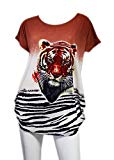

image url https://images-na.ssl-images-amazon.com/images/I/51a33K-9qfL._SL160_.jpg
Product Title:  burnt umber tiger tshirt zebra stripes xl  xxl 
Euclidean Distance from input image: 1.193156698988601
Amazon Url: www.amzon.com/dp/B00JXQB5FQ


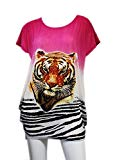

image url https://images-na.ssl-images-amazon.com/images/I/51idp4BP50L._SL160_.jpg
Product Title:  pink tiger tshirt zebra stripes xl  xxl 
Euclidean Distance from input image: 8.898834959060181
Amazon Url: www.amzon.com/dp/B00JXQASS6


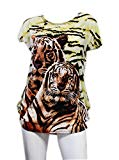

image url https://images-na.ssl-images-amazon.com/images/I/511SmrC%2BS1L._SL160_.jpg
Product Title:  yellow tiger tshirt tiger stripes  l 
Euclidean Distance from input image: 11.390260529518127
Amazon Url: www.amzon.com/dp/B00JXQCUIC


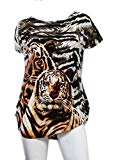

image url https://images-na.ssl-images-amazon.com/images/I/51tOiBaq5FL._SL160_.jpg
Product Title:  brown  white tiger tshirt tiger stripes xl  xxl 
Euclidean Distance from input image: 12.124682690614765
Amazon Url: www.amzon.com/dp/B00JXQCWTO


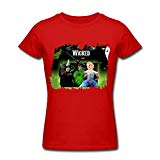

image url https://images-na.ssl-images-amazon.com/images/I/41MfxJB7NHL._SL160_.jpg
Product Title:  womans wicked musical poster shirts red xxl 
Euclidean Distance from input image: 12.913814210982068
Amazon Url: www.amzon.com/dp/B01KUN4VWE


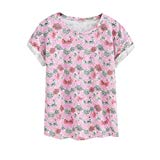

image url https://images-na.ssl-images-amazon.com/images/I/51RGoNmLPvL._SL160_.jpg
Product Title:  kawaii pastel tops tees pink flower design 
Euclidean Distance from input image: 13.091140870083274
Amazon Url: www.amzon.com/dp/B071FCWD97


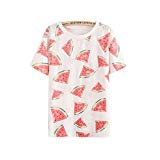

image url https://images-na.ssl-images-amazon.com/images/I/4102LGNS0gL._SL160_.jpg
Product Title:  womens thin style tops tees pastel watermelon print 
Euclidean Distance from input image: 13.100436735243543
Amazon Url: www.amzon.com/dp/B01JUNHBRM


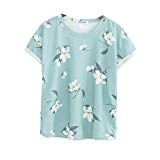

image url https://images-na.ssl-images-amazon.com/images/I/416SMHNfa2L._SL160_.jpg
Product Title:  kawaii pastel tops tees baby blue flower design 
Euclidean Distance from input image: 13.128185941690509
Amazon Url: www.amzon.com/dp/B071SBCY9W


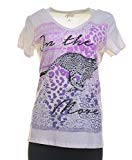

image url https://images-na.ssl-images-amazon.com/images/I/518s71-5p2L._SL160_.jpg
Product Title:  edv cheetah run purple multi xl 
Euclidean Distance from input image: 13.144176149368286
Amazon Url: www.amzon.com/dp/B01CUPYBM0


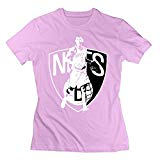

image url https://images-na.ssl-images-amazon.com/images/I/41s5u1SPNGL._SL160_.jpg
Product Title:  vansty jeremy lin brooklin short sleeves shirt women pink size 
Euclidean Distance from input image: 13.165473556518554
Amazon Url: www.amzon.com/dp/B01HU4NSBQ


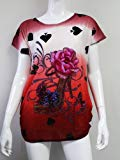

image url https://images-na.ssl-images-amazon.com/images/I/51bn7u17uzL._SL160_.jpg
Product Title:  red  pink floral heel sleeveless shirt xl  xxl 
Euclidean Distance from input image: 13.243118381590588
Amazon Url: www.amzon.com/dp/B00JV63QQE


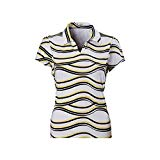

image url https://images-na.ssl-images-amazon.com/images/I/41jQrkbDj%2BL._SL160_.jpg
Product Title:  nancy lopez whimsy short sleeve  whiteblacklemon drop  xs 
Euclidean Distance from input image: 13.248762061113421
Amazon Url: www.amzon.com/dp/B01MPX6IDX


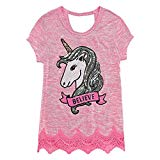

image url https://images-na.ssl-images-amazon.com/images/I/51XD5QetQTL._SL160_.jpg
Product Title:  miss chievous juniors striped peplum tank top medium shadowpeach 
Euclidean Distance from input image: 13.250145888418896
Amazon Url: www.amzon.com/dp/B0177DM70S


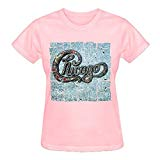

image url https://images-na.ssl-images-amazon.com/images/I/51u-P0GlqBL._SL160_.jpg
Product Title:  chicago chicago 18 shirt women pink 
Euclidean Distance from input image: 13.272092417524979
Amazon Url: www.amzon.com/dp/B01GXAZTRY


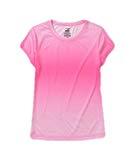

image url https://images-na.ssl-images-amazon.com/images/I/310GPY615nL._SL160_.jpg
Product Title:  danskin womens vneck loose performance tee xsmall pink ombre 
Euclidean Distance from input image: 13.280162815082969
Amazon Url: www.amzon.com/dp/B01F7PHXY8


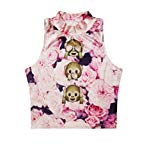

image url https://images-na.ssl-images-amazon.com/images/I/416bBaS5WdL._SL160_.jpg
Product Title:  kingde star pink flower dog stamp sleeveless vestbqn24 
Euclidean Distance from input image: 13.28689296435744
Amazon Url: www.amzon.com/dp/B015H3W9BM


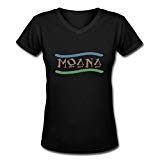

image url https://images-na.ssl-images-amazon.com/images/I/41qWp4ZhAEL._SL160_.jpg
Product Title:  moana logo adults hot v neck shirt black xxl 
Euclidean Distance from input image: 13.28703518276088
Amazon Url: www.amzon.com/dp/B01LX6H43D


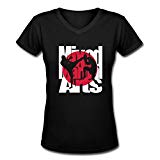

image url https://images-na.ssl-images-amazon.com/images/I/41okM7UcReL._SL160_.jpg
Product Title:  women japanese mixed martial arts teeblack tshirts hgiorgis xxl black 
Euclidean Distance from input image: 13.287316395753924
Amazon Url: www.amzon.com/dp/B01JQ096HW


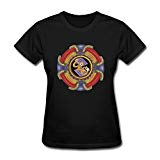

image url https://images-na.ssl-images-amazon.com/images/I/410ujedGEaL._SL160_.jpg
Product Title:  dasy womens neck electric light orchestra logo shirt xxlarge black 
Euclidean Distance from input image: 13.290641834253375
Amazon Url: www.amzon.com/dp/B016EXUZC4


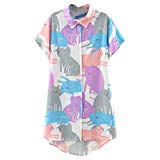

image url https://images-na.ssl-images-amazon.com/images/I/41cbRDEic1L._SL160_.jpg
Product Title:  abaday multicolor cartoon cat print short sleeve longline shirt large 
Euclidean Distance from input image: 13.293171194838212
Amazon Url: www.amzon.com/dp/B01CR57YY0


In [24]:

apparelrecomendation(12566, 5, 5, 5, 5 ,20)